In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Histogram
Histograms are prevalent(powerfull) in nearly every aspect of computer vision. We use grayscale histograms for thresholding. We use histograms for white balancing. We use color histograms for object tracking in images, such as with the CamShift algorithm. We use color histograms as features — include color histograms in multiple dimensions. And in an abstract sense, we use histograms of image gradients to form the HOG and SIFT descriptors. Even the extremely popular bag-of-visual-words representation used in image search engines and machine learning is a histogram as well! And in all likelihood, I’m sure this is not the first time you have run across histograms in your studies.

# what’s a histogram?
So, what exactly is a histogram? A histogram represents the distribution of pixel intensities (whether color or gray- scale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition(the ability to understand something instinctively, without the need for conscious reasoning.) of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255.

When plotting the histogram, the X-axis serves as our “bins.” If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128] or [128, 255]. The number of pixels binned to the x-axis value is then plotted on the y-axis.

# Using OpenCV to Compute Histograms
Now, let’s start building some histograms of our own.

We will be using the cv2.calcHist  function to build our histograms. Before we get into any code examples, let’s quickly review the function:

# cv2.calcHist(images, channels, mask, histSize, ranges)
# images:
This is the image that we want to compute a histogram for. Wrap it as a list: [myImage] .
# channels:
A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0] . To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2] .
# mask: 
Remember learning about masks in Section 1.4.8? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None .
# histSize:
This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32] .
# ranges:
The range of possible pixel values. Normally, this is [0, 256] (this is not a typo — the ending range of the cv2.calcHist  function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)

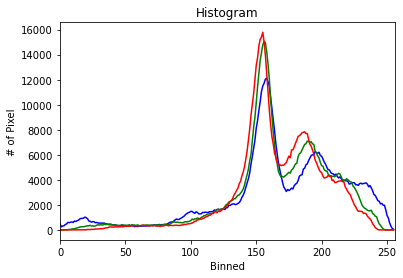

In [3]:
image=cv2.imread("2.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.axis("On")
chanel=cv2.split(image)
color=["b","g","r"]
plt.title("Histogram")
plt.xlabel("Binned")
plt.ylabel("# of Pixel")
for (chan ,color) in zip(chanel,color):
    hist=cv2.calcHist([chan],[0],None,[256],[0,256])
    plt.plot(hist,color=color)
    plt.xlim([0,256])


In [ ]:
# Three integers (nrows, ncols, index)
fig=plt.figure()
ax=fig.add_subplot(131)
hist=cv2.calcHist(chanel[0],chanel[1],[0,1],None,[128,180],[0,256,0,256])
#p=ax.imshow(hist,interpolation="nearest")
#ax.title("2D Color Histogram for B and R")
#plt.colorbar(p)

# blob
In Image processing, blob detection refers to modules that are aimed at detecting points and/or regions in the image that differ in properties like brightness or color compared to the surrounding.